In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_selection import mutual_info_regression

# **Курсовая работа**
## **Exploratory Data Analysis (EDA)**

###  **Считаем данные**

In [2]:
df = pd.read_excel("data.xlsx")
df.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,...,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,...,0,0,0,0,0,0,0,0,3,0
2,2,223.808778,161.142320,0.720000,2.627117,2.627117,0.543231,0.543231,0.260923,42.187500,...,0,0,0,0,0,0,0,0,3,0
3,3,1.705624,107.855654,63.235294,5.097360,5.097360,0.390603,0.390603,0.377846,41.862069,...,0,0,0,0,0,0,0,0,4,0
4,4,107.131532,139.270991,1.300000,5.150510,5.150510,0.270476,0.270476,0.429038,36.514286,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


#### **Произведем оценку данных считав названия всех параметров**

In [4]:

for col in df.columns:
    print(col)

Unnamed: 0
IC50, mM
CC50, mM
SI
MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
SPS
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v
Chi2n
Chi2v
Chi3n
Chi3v
Chi4n
Chi4v
HallKierAlpha
Ipc
Kappa1
Kappa2
Kappa3
LabuteASA
PEOE_VSA1
PEOE_VSA10
PEOE_VSA11
PEOE_VSA12
PEOE_VSA13
PEOE_VSA14
PEOE_VSA2
PEOE_VSA3
PEOE_VSA4
PEOE_VSA5
PEOE_VSA6
PEOE_VSA7
PEOE_VSA8
PEOE_VSA9
SMR_VSA1
SMR_VSA10
SMR_VSA2
SMR_VSA3
SMR_VSA4
SMR_VSA5
SMR_VSA6
SMR_VSA7
SMR_VSA8
SMR_VSA9
SlogP_VSA1
SlogP_VSA10
SlogP_VSA11
SlogP_VSA12
SlogP_VSA2
SlogP_VSA3
SlogP_VSA4
SlogP_VSA5
SlogP_VSA6
SlogP_VSA7
SlogP_VSA8
SlogP_VSA9
TPSA
EState_VSA1
EState_VSA10
EState_VSA11
EState_VSA2
EState_VSA3
EState_VSA4

### **Наши данные представляют собой различные дескрипторы, которые можно разбить на группы исходя из свойств которые они описывают**

### 1.**Целевые переменные - Биологическая активность и токсичность**

**a). IC₅₀ (Half Maximal Inhibitory Concentration)**  
**Определение:**  
IC₅₀ – это концентрация соединения, при которой наблюдается **50%-ное ингибирование** целевого биологического процесса (например, активности фермента, роста клеток или вирусной репликации).  

**Пример:**  
- **Чем ниже IC₅₀, тем сильнее соединение** (меньшая концентрация нужна для эффекта).  
- Пример:  
  - IC₅₀ = **1 мкМ (0.001 мМ)** → очень активное соединение.  
  - IC₅₀ = **100 мкМ (0.1 мМ)** → слабое соединение.  
 

**b). CC₅₀ (Half Maximal Cytotoxic Concentration)**  
**Определение:**  
CC₅₀ – это концентрация вещества, при которой **погибает 50% клеток** (цитотоксичность).    

**Пример:**  
- **Чем выше CC₅₀, тем безопаснее соединение** (нужна большая доза для токсичности).  
- Пример:  
  - CC₅₀ = **10 мМ** → низкая токсичность.  
  - CC₅₀ = **0.01 мМ (10 мкМ)** → высокая токсичность.  


**c). SI (Selectivity Index – Индекс Селективности)**  
**Определение:**  
SI = **CC₅₀ / IC₅₀**  
Показывает, насколько соединение **избирательно** действует на мишень, а не убивает клетки.  

**Пример:**  
- **SI > 10** – хорошая селективность (препарат эффективен и безопасен).  
- **SI = 1–10** – умеренная селективность (возможны побочные эффекты).  
- **SI < 1** – опасное соединение (токсичность превышает эффективность).  


### **Идеальный препарат:**  
- **Низкий IC₅₀** (сильное действие)  
- **Высокий CC₅₀** (низкая токсичность)  
- **Высокий SI** (хорошая селективность)  

---

### 2. **Электронные и стерические свойства (E-State Indices)**
- **MaxAbsEStateIndex, MinAbsEStateIndex** – Максимальное и минимальное абсолютные значения электронных индексов (E-State).
- **MaxEStateIndex, MinEStateIndex** – Максимальное и минимальное значения электронных индексов (E-State), описывающих электронную плотность атомов.

---

### 3. **Физико-химические свойства**
- **qed (Quantitative Estimate of Drug-likeness)** – Оценка "лекарственности" молекулы (близость к лекарственным соединениям).
- **MolWt (Molecular Weight)** – Молекулярная масса.
- **ExactMolWt** – Точная молекулярная масса.
- **HeavyAtomMolWt** – Масса тяжелых атомов (без водородов).
- **MolLogP** – Логарифм коэффициента распределения октанол/вода (мера липофильности).
- **MolMR (Molar Refractivity)** – Молярная рефракция (связана с поляризуемостью).
- **TPSA (Topological Polar Surface Area)** – Топологическая полярная поверхность (влияет на проницаемость мембран).
- **FractionCSP3** – Доля sp³-гибридизированных атомов углерода (влияет на жесткость молекулы).

---

### 4. **Электронные и зарядовые характеристики**
- **NumValenceElectrons** – Число валентных электронов.
- **Max/Min PartialCharge** – Максимальный и минимальный парциальные заряды.
- **BCUT2D_*** – Дескрипторы, описывающие распределение зарядов, поляризуемость и гидрофобность (например, `BCUT2D_CHGHI` – максимальный заряд, `BCUT2D_LOGPHI` – гидрофобность).

---

### 5. **Топологические и графовые дескрипторы**
- **BalabanJ, BertzCT** – Топологические индексы, описывающие сложность молекулярного графа.
- **Chi0, Chi1, Chi2...** – Индексы Ки (описывают молекулярную ветвистость).
- **Kappa1, Kappa2, Kappa3** – Индексы формы молекулы (каппа-индексы).
- **HallKierAlpha** – Индекс, учитывающий гибридизацию и топологию.

---

### 6. **Поверхностные и объемные свойства**
- **LabuteASA** – Оценка молекулярной поверхности.
- **PEOE_VSA*, SMR_VSA*, SlogP_VSA*** – Дескрипторы, связывающие заряд, полярность и растворимость с поверхностью.
- **EState_VSA*, VSA_EState*** – Комбинация электронных индексов и поверхностных свойств.

---

### 7. **Функциональные группы и фрагменты (fr_*)**
- **fr_Al_OH (алифатические OH), fr_Ar_OH (ароматические OH), fr_COO (карбоксилаты), fr_halogen (галогены)** и др. – Бинарные или количественные признаки наличия функциональных групп.
- **fr_amide, fr_ester, fr_ketone** – Признаки амидов, сложных эфиров, кетонов и т. д.

---

### 8. **Структурные особенности**
- **NumHAcceptors, NumHDonors** – Число акцепторов и доноров водородных связей.
- **NumRotatableBonds** – Число вращающихся связей (гибкость молекулы).
- **RingCount** – Общее число циклов.
- **NumArsomaticRings, NumAliphaticRing** – Число ароматических и алифатических циклов.
- **HeavyAtomCount** – Число тяжелых атомов (не водород).

---

### 9. **Фармакофорные и ADME-свойства**
- **SPS (Synthetic Accessibility Score)** – Оценка сложности синтеза.
- **NHOHCount, NOCount** – Число NH/OH-групп и N/O-атомов.
- **NumHeteroatoms** – Число гетероатомов (N, O, S, P и др.).


In [5]:
df.describe()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000
mean,500.000000,222.805156,589.110728,72.508823,10.831637,10.831637,0.180681,-0.967237,0.580412,29.487989,...,0.053946,0.011988,0.008991,0.000999,0.000999,0.051948,0.0,0.069930,0.204795,0.006993
std,289.108111,402.169734,642.867508,684.482739,3.307505,3.307505,0.168710,1.588036,0.212230,12.742749,...,0.259011,0.108886,0.094441,0.031607,0.031607,0.222033,0.0,0.255157,1.215326,0.083373
min,0.000000,0.003517,0.700808,0.011489,2.321942,2.321942,0.000039,-6.992796,0.059567,9.416667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,250.000000,12.515396,99.999036,1.433333,9.252350,9.252350,0.051073,-1.334487,0.442842,18.486486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,500.000000,46.585183,411.039342,3.846154,12.179236,12.179236,0.124606,-0.419485,0.634981,29.290323,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,750.000000,224.975928,894.089176,16.566667,13.167843,13.167843,0.291020,0.061754,0.742483,38.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,1000.000000,4128.529377,4538.976189,15620.600000,15.933463,15.933463,1.374614,1.374614,0.947265,60.272727,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,20.000000,1.000000


### **Итак у нас есть несколько задач**
    Регрессия для IC50
    Регрессия для CC50
    Регрессия для SI
    Классификация: превышает ли значение IC50 медианное значение выборки
    Классификация: превышает ли значение CC50 медианное значение выборки
    Классификация: превышает ли значение SI медианное значение выборки
    Классификация: превышает ли значение SI значение 8

#### Создадим недостающие целевые переменные

In [6]:
df["IC50_class"] = df["IC50, mM"] > df["IC50, mM"].median()
df["CC50_class"] = df["CC50, mM"] > df["CC50, mM"].median()
df["SI_class"] = df["SI"] > df["SI"].median()
df["SI_8"] = df["SI"] > 8

### **Проверка наличия пропусков**

In [7]:
df.columns[df.isna().any()]

Index(['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI',
       'BCUT2D_MRLOW'],
      dtype='object')

In [8]:
df[df.isna().any(axis=1)]

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,IC50_class,CC50_class,SI_class,SI_8
78,78,1127.094988,1127.094988,1.000000,11.617504,11.617504,0.053210,-1.472941,0.344754,12.882353,...,0,0,0,0,0,0,True,True,False,False
79,79,25.171788,1878.491646,74.626866,11.617504,11.617504,0.053210,-1.472941,0.344754,12.882353,...,0,0,0,0,0,0,False,True,True,True
80,80,1199.174968,1199.174968,1.000000,11.600528,11.600528,0.228349,-0.861204,0.286242,10.937500,...,0,0,0,0,0,0,True,True,False,False


#### Итак мы видим что всего 3 строки с пропусками, поэтому просто удалим их

In [9]:
df = df.dropna()
df[df.isna().any(axis=1)]

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,IC50_class,CC50_class,SI_class,SI_8


### **Проверка данных на дубликаты**

#### Удалим признак "Unnamed: 0" так как это просто индексы строк они могут помешать найти дубликаты

In [10]:
df = df.drop(columns="Unnamed: 0")

In [11]:
duplicates = df[df.duplicated()]
duplicates

,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,IC50_class,CC50_class,SI_class,SI_8
84,83.619244,2533.916472,30.303030,8.848320,8.848320,0.261583,0.261583,0.722639,44.571429,197.322,...,0,0,0,0,0,0,True,True,True,True
88,2200.501846,3284.331113,1.492537,11.810278,11.810278,0.006944,-0.006944,0.520631,46.818182,152.237,...,0,0,0,0,0,0,True,True,False,False
95,5.191051,195.662678,37.692308,5.503519,5.503519,0.397743,0.397743,0.715571,35.555556,250.430,...,0,0,0,0,3,0,False,False,True,True
103,114.989975,2106.043502,18.315018,4.959653,4.959653,0.391420,0.391420,0.669233,38.000000,237.411,...,0,0,0,0,0,0,True,True,True,True
107,143.971301,1988.553884,13.812155,4.982986,4.982986,0.397080,0.397080,0.536458,36.555556,251.438,...,0,0,0,0,0,0,True,True,True,True
169,26.097736,411.039342,15.750000,6.129792,6.129792,0.442130,0.442130,0.566765,53.454545,153.269,...,0,0,0,0,0,0,False,False,True,True
172,11.339368,22.048772,1.944444,5.382755,5.382755,0.119792,0.119792,0.651871,29.500000,317.476,...,0,0,0,0,0,0,False,False,False,False
500,433.423587,764.865154,1.764706,13.943759,13.943759,0.025276,-6.992796,0.683628,13.769231,392.221,...,0,0,0,0,0,0,True,True,False,False
508,28.958312,30.695810,1.060000,12.764026,12.764026,0.103258,-4.525895,0.345716,12.130435,345.325,...,0,0,0,0,0,0,False,False,False,False
574,1254.185845,1254.185845,1.000000,12.510824,12.510824,0.157801,-4.516081,0.814586,11.470588,239.196,...,0,0,0,0,0,0,True,True,False,False


In [12]:
df =  df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 966 entries, 0 to 1000
Columns: 217 entries, IC50, mM to SI_8
dtypes: bool(4), float64(107), int64(106)
memory usage: 1.6 MB


### **Пересчет значения  SI**

Мы знаем чтто $SI=CC50/IC50$

In [13]:
df["SI"] = df["CC50, mM"] / df["IC50, mM"]

### **Проверка наличия выбросов в целевых переменных**

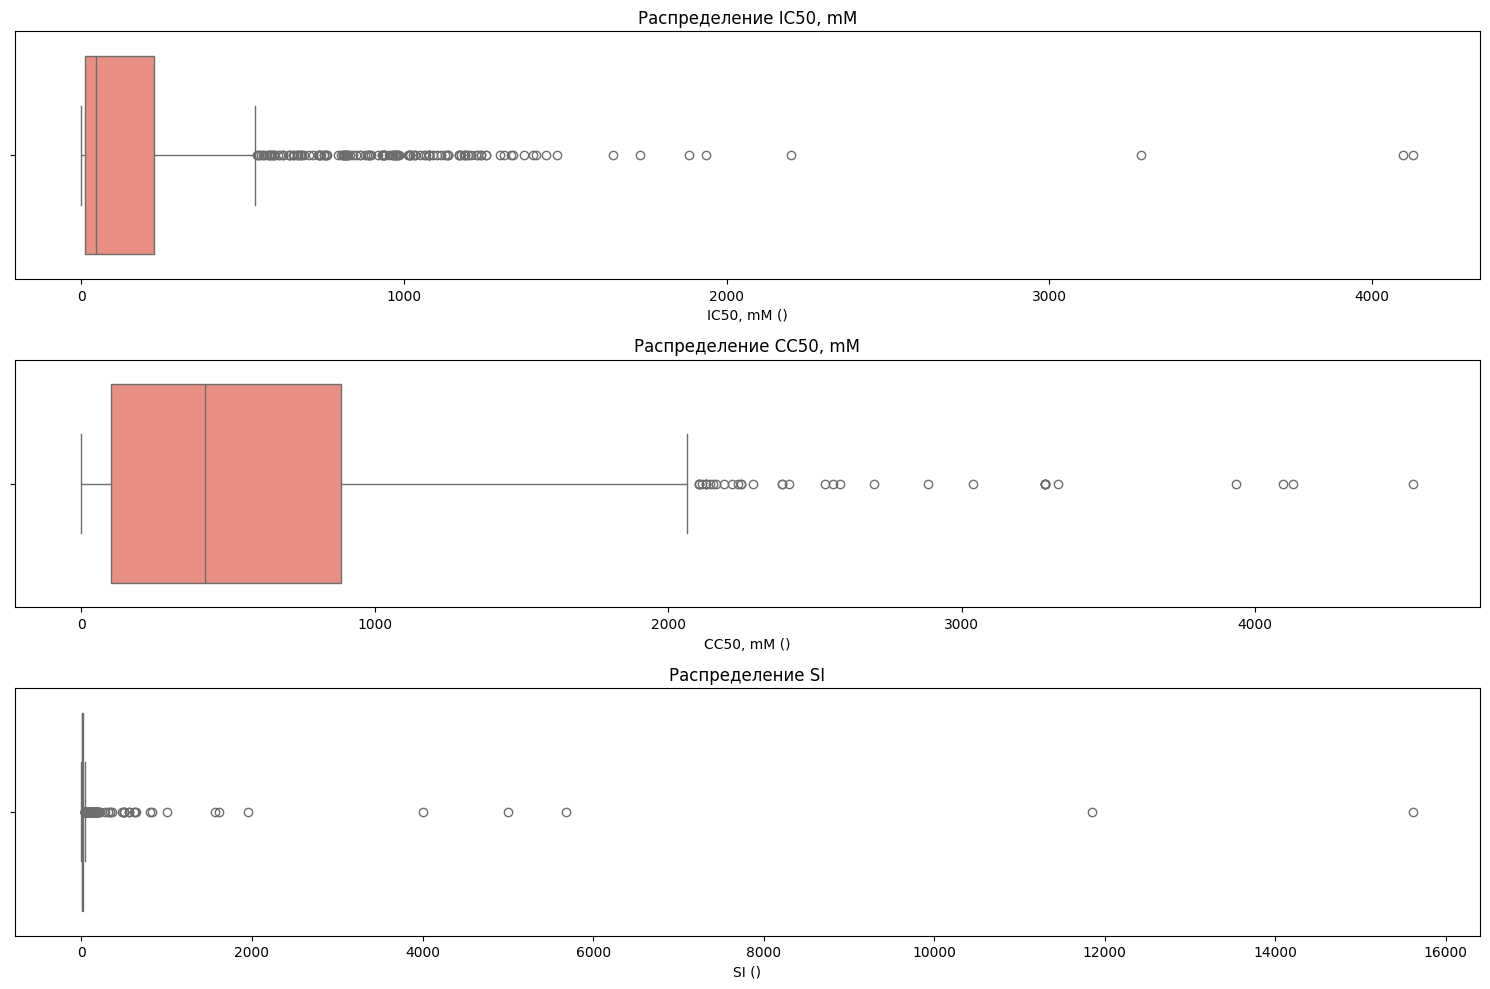

In [14]:

# Список признаков для анализа
features = ["IC50, mM", "CC50, mM", "SI"]

# Создаем сетку графиков
fig, axes = plt.subplots(len(features), 1, figsize=(15, 10))

# Цикл по признакам
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i], color="salmon")
    axes[i].set_title(f"Распределение {feature}", fontsize=12)
    axes[i].set_xlabel(f"{feature} ({'мМ' if feature in ['IC50', 'CC50'] else ''})")

plt.tight_layout()  
plt.show()

#### Итак удалим значения где  IC50 превышает 1000мМ, а так же значения SI превышающие 1000, так как это явно выбросы, значения  СС50 могут быть любыми.

In [15]:
filter = (df["IC50, mM"] <= 1000) & (df["SI"] <= 1000)
df = df[filter]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 0 to 1000
Columns: 217 entries, IC50, mM to SI_8
dtypes: bool(4), float64(107), int64(106)
memory usage: 1.5 MB


### **Оценка распределения целевых переменных**

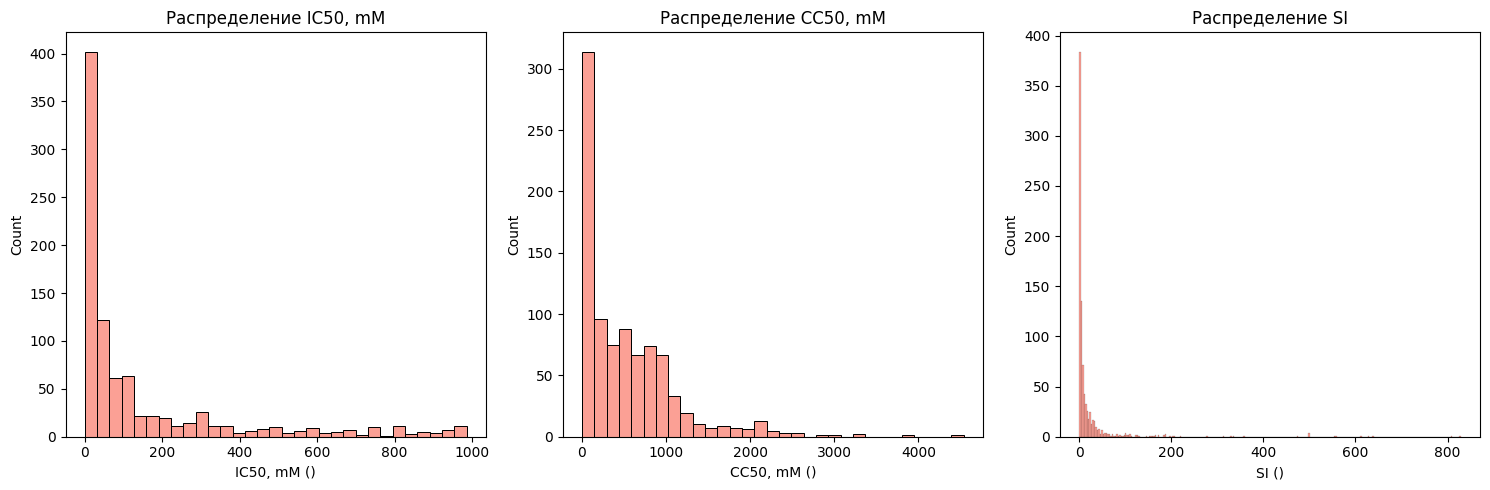

In [16]:
# Создаем сетку графиков
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

# Цикл по признакам
for i, feature in enumerate(features):
    sns.histplot(x=df[feature], ax=axes[i], color="salmon")
    axes[i].set_title(f"Распределение {feature}", fontsize=12)
    axes[i].set_xlabel(f"{feature} ({'мМ' if feature in ['IC50', 'CC50'] else ''})")

plt.tight_layout()  
plt.show()

### Распределение всех целевых переменных напоминает геометрическое. Попробуем привести его к нормальному

### **Логарифмирование целевых переменных**

In [17]:
df[features] = df[features].replace(0, 1e-10).apply(np.log) # замена 0 на близкое число и логарифмирование

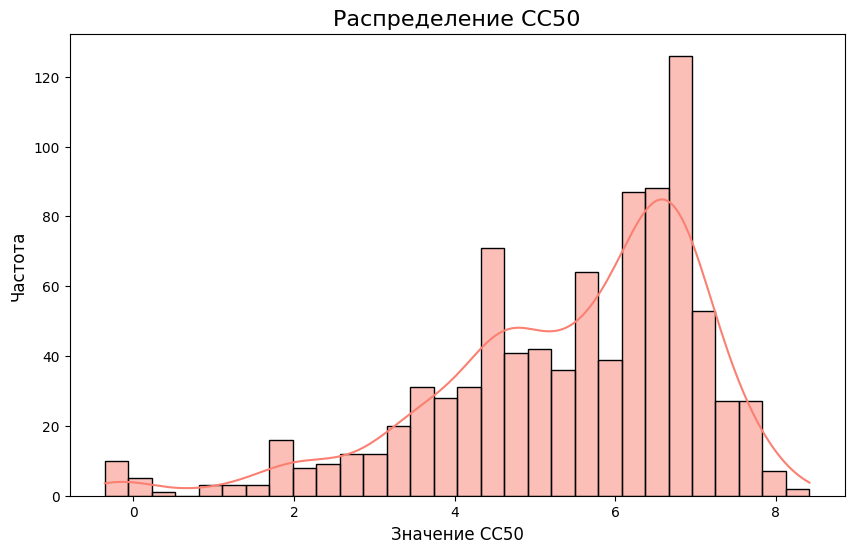

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CC50, mM', bins=30, kde=True, color='salmon')

# Добавляем заголовок и подписи
plt.title('Распределение CC50', fontsize=16)
plt.xlabel('Значение CC50', fontsize=12)
plt.ylabel('Частота', fontsize=12)

# Отображаем график
plt.show()

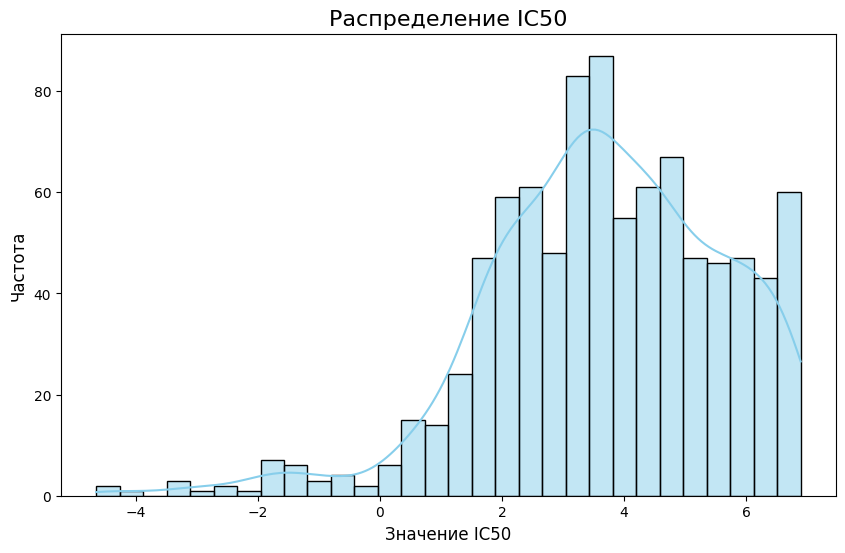

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='IC50, mM', bins=30, kde=True, color='skyblue')

# Добавляем заголовок и подписи
plt.title('Распределение IC50', fontsize=16)
plt.xlabel('Значение IC50', fontsize=12)
plt.ylabel('Частота', fontsize=12)

# Отображаем график
plt.show()

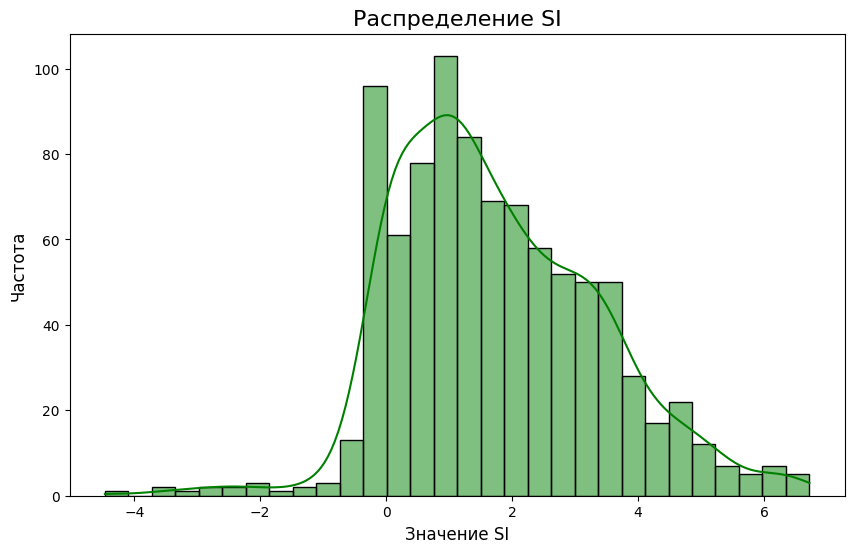

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='SI', bins=30, kde=True, color='green')

# Добавляем заголовок и подписи
plt.title('Распределение SI', fontsize=16)
plt.xlabel('Значение SI', fontsize=12)
plt.ylabel('Частота', fontsize=12)

# Отображаем график
plt.show()

### Распределения стали более похожи на нормальные

### **Обработка признаков**

**Некоторые признаки содержат только 0, они не информативны, удалим их.**

In [21]:
zero_col = df.columns[df.sum() == 0]


In [22]:
zero_col = df.columns[df.sum() == 0]
df = df.drop(columns=zero_col)
print(f"Удаленные признаки:{zero_col.to_list()}")


Удаленные признаки:['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_Ar_COO', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']


### **Липофильность/Гидрофильность**
**Объединим признаки по группам**
Гидрофильные атомы: SlogP_VSA1, SlogP_VSA2, SlogP_VSA3 (SlogP < 0).

Умеренно полярные: SlogP_VSA4, SlogP_VSA5, SlogP_VSA6 (0 ≤ SlogP < 0.3).

Липофильные атомы: SlogP_VSA7, SlogP_VSA8, SlogP_VSA9,  SlogP_VSA10 (SlogP ≥ 0.3).

Граничные значения: SlogP_VSA11, SlogP_VSA12,

In [23]:
df['Hydrophilic_VSA'] = df[['SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3']].sum(axis=1)
df['Moderate_VSA'] = df[['SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6']].sum(axis=1)
df['Lipophilic_VSA'] = df[['SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA10']].sum(axis=1)
df['frointier_VSA'] = df[['SlogP_VSA11', 'SlogP_VSA12']].sum(axis=1)

### **Фрагментные признаки**

In [24]:
corr_matrix = df.filter(like='fr').corr().abs()

fig_C = px.imshow(corr_matrix, 
                text_auto=True,  # отображение значений на карте
                color_continuous_scale='sunset', 
                title='Корреляционная матрица',
                width=1400,
                height=1400
               )


fig_C.show()

In [25]:
high_corr_list = []
del_list = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.8:
            high_corr_list.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Сортируем по убыванию корреляции
high_corr_list.sort(key=lambda x: abs(x[2]), reverse=True)

print("Топ коррелирующих пар:")
for pair in high_corr_list:
    print(f"{pair[0]} и {pair[1]}: {pair[2]:.2f}")
    del_list.append(pair[1])

Топ коррелирующих пар:
fr_Al_COO и fr_COO: 1.00
fr_Al_COO и fr_COO2: 1.00
fr_Ar_NH и fr_Nhpyrrole: 1.00
fr_COO и fr_COO2: 1.00
fr_phenol и fr_phenol_noOrthoHbond: 1.00
fr_Ar_OH и fr_phenol: 0.99
fr_Ar_OH и fr_phenol_noOrthoHbond: 0.99
fr_C_O и fr_C_O_noCOO: 0.98
fr_Al_OH и fr_Al_OH_noTert: 0.96
fr_nitro_arom и fr_nitro_arom_nonortho: 0.96
fr_ketone и fr_ketone_Topliss: 0.84
fr_alkyl_halide и fr_halogen: 0.81
fr_Ar_N и fr_NH0: 0.80


In [26]:
del_list

['fr_COO',
 'fr_COO2',
 'fr_Nhpyrrole',
 'fr_COO2',
 'fr_phenol_noOrthoHbond',
 'fr_phenol',
 'fr_phenol_noOrthoHbond',
 'fr_C_O_noCOO',
 'fr_Al_OH_noTert',
 'fr_nitro_arom_nonortho',
 'fr_ketone_Topliss',
 'fr_halogen',
 'fr_NH0']

In [27]:
for i in set(del_list):
    print(f'Удаляем признак {i}')
df.drop(columns=list(set(del_list)), inplace=True)

Удаляем признак fr_COO2
Удаляем признак fr_Al_OH_noTert
Удаляем признак fr_COO
Удаляем признак fr_NH0
Удаляем признак fr_phenol
Удаляем признак fr_Nhpyrrole
Удаляем признак fr_C_O_noCOO
Удаляем признак fr_halogen
Удаляем признак fr_nitro_arom_nonortho
Удаляем признак fr_phenol_noOrthoHbond
Удаляем признак fr_ketone_Topliss


### **Электронные дескрипторы**

In [28]:
corr_matrix = df.filter(like='BCUT2D').corr().abs()

fig_C = px.imshow(corr_matrix, 
                text_auto=True,  # отображение значений на карте
                color_continuous_scale='sunset', 
                title='Корреляционная матрица',
                width=800,
                height=800
               )


fig_C.show()

In [29]:
high_corr_list = []
del_list = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > 0.8:
            high_corr_list.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Сортируем по убыванию корреляции
high_corr_list.sort(key=lambda x: abs(x[2]), reverse=True)

print("Топ коррелирующих пар:")
for pair in high_corr_list:
    print(f"{pair[0]} и {pair[1]}: {pair[2]:.2f}")
    del_list.append(pair[1])

Топ коррелирующих пар:
BCUT2D_MWHI и BCUT2D_MRHI: 0.88
BCUT2D_CHGLO и BCUT2D_LOGPLOW: 0.86
BCUT2D_CHGHI и BCUT2D_LOGPHI: 0.85


In [30]:
del_list

['BCUT2D_MRHI', 'BCUT2D_LOGPLOW', 'BCUT2D_LOGPHI']

In [31]:
for i in set(del_list):
    print(f'Удаляем признак {i}')
df.drop(columns=list(set(del_list)), inplace=True)

Удаляем признак BCUT2D_LOGPHI
Удаляем признак BCUT2D_MRHI
Удаляем признак BCUT2D_LOGPLOW


**Создадим признак DiffPartialCharge - разница зарядов**

In [32]:
df["DiffPartialCharge"] = df["MaxPartialCharge"] - df["MinPartialCharge"]


**Создадим признак DiffEStateIndex - разница электронной плотности**

In [33]:
df["DiffEStateIndex"] = df["MaxEStateIndex"] - df["MinEStateIndex"]

### **Отбор признаков**

Для отбора признаков регрессии  и классификации задействуем **Mutual Info Regression**


    Создадим копии данных для отбора признаков по каждой целевой переменной

### **Регрессия СС50**

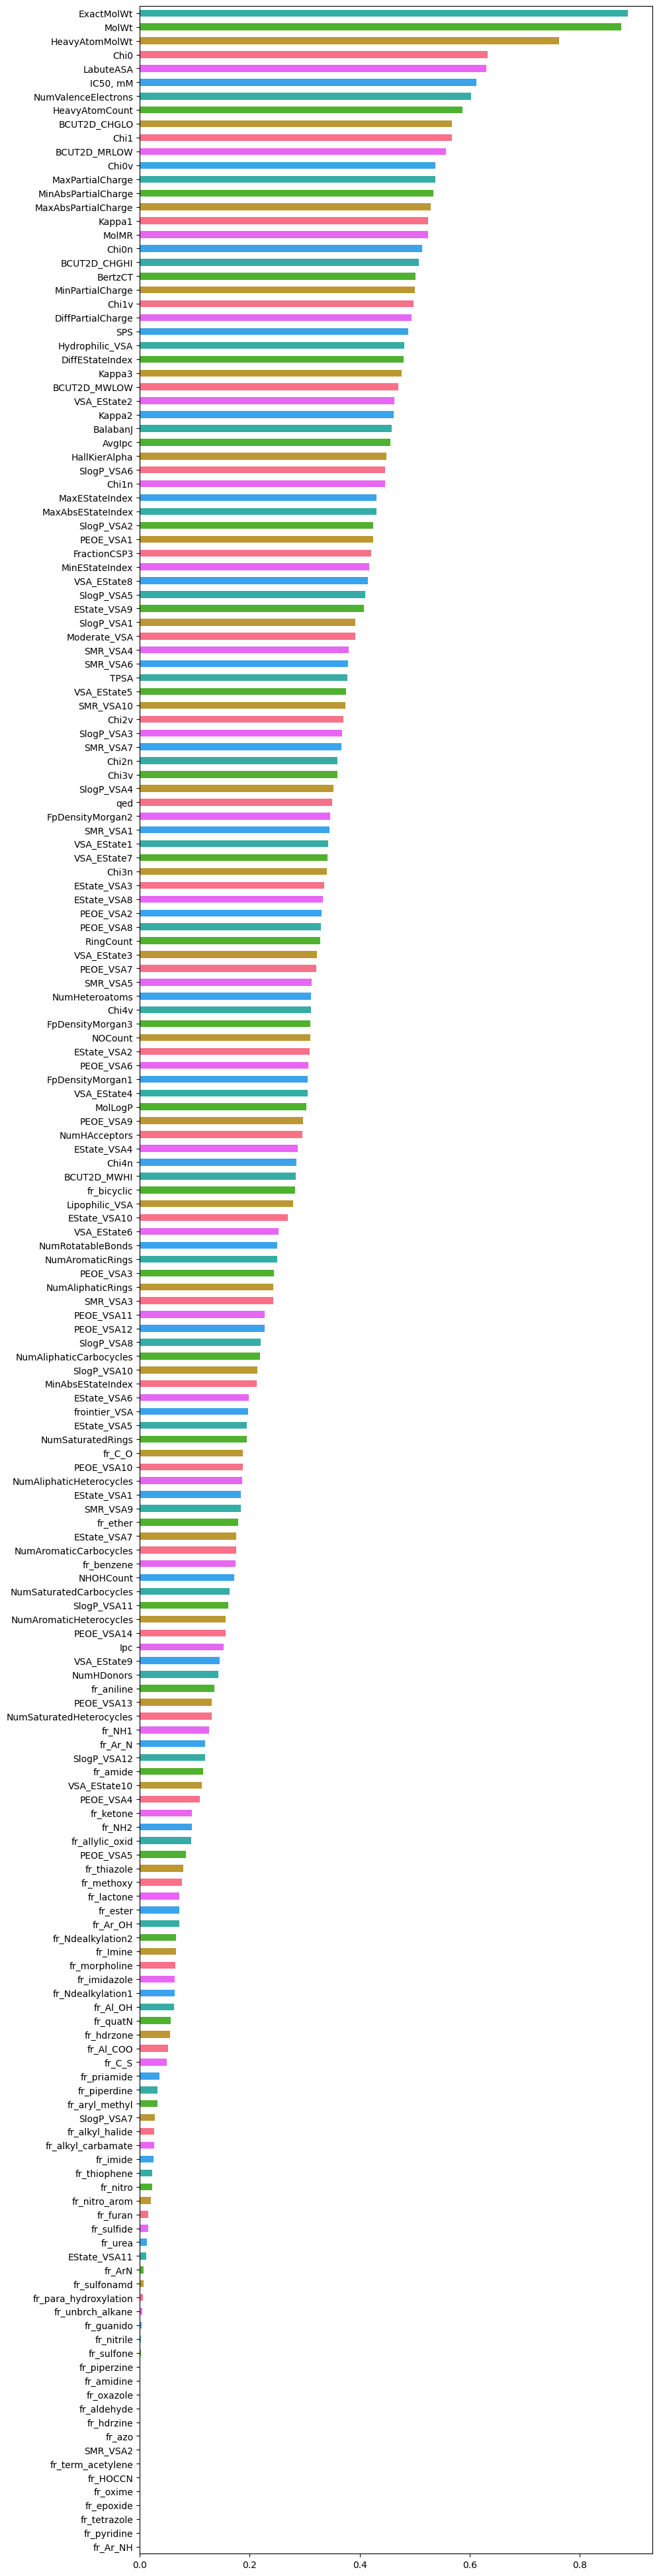

In [44]:
df_regr_CC50 = df.copy()
#Удалим другие сильнозависимые переменные
df_regr_CC50.drop(columns=["IC50_class","CC50_class", "SI_class", "SI_8", "SI"], inplace=True)

Y = df_regr_CC50["CC50, mM"]
X = df_regr_CC50.drop(columns="CC50, mM")

importances = mutual_info_regression(X, Y)

feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

colors = sns.color_palette("husl")
plt.figure(figsize=(10,50))
feature_importances.plot(kind='barh', color=colors)
plt.show()

**Удалим значения меньше 0.25**

In [45]:
del_list = feature_importances[feature_importances < 0.25].index.to_list()
df_regr_CC50.drop(columns=del_list,inplace=True)

### **Регрессия IC50**

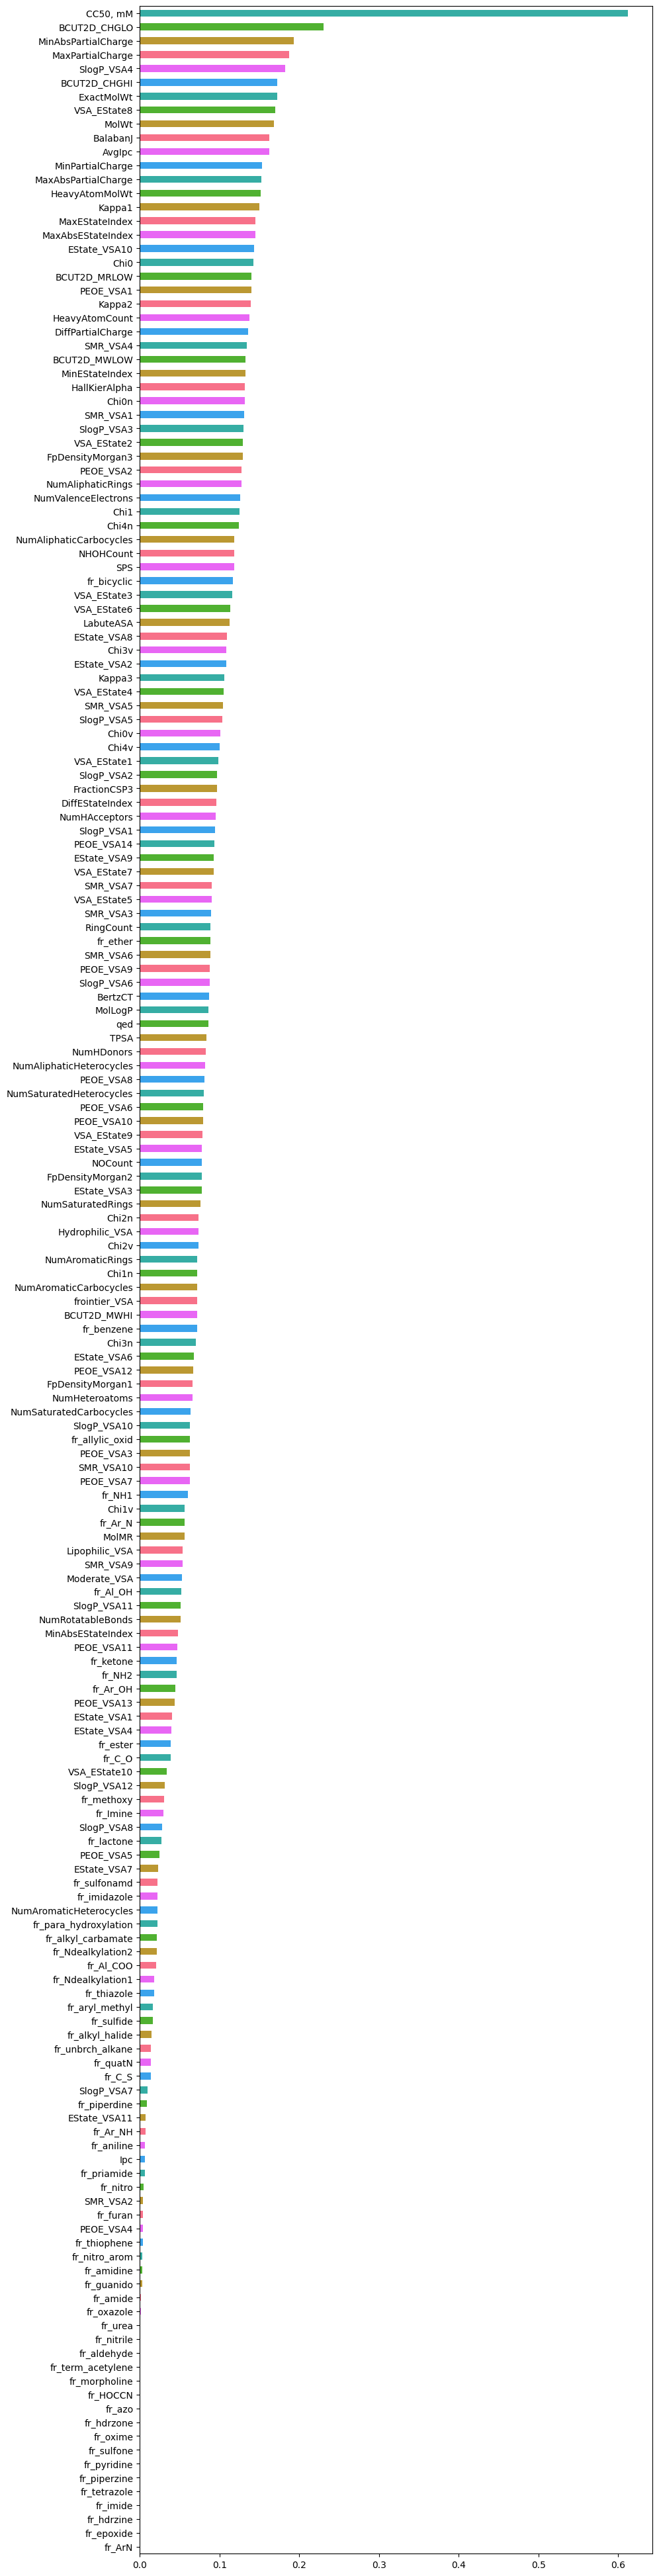

In [46]:
df_regr_IC50 = df.copy()
#Удалим другие сильнозависимые переменные
df_regr_IC50.drop(columns=["IC50_class","CC50_class", "SI_class", "SI_8", "SI"], inplace=True)

Y = df_regr_IC50["IC50, mM"]
X = df_regr_IC50.drop(columns="IC50, mM")

importances = mutual_info_regression(X, Y)

feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

colors = sns.color_palette("husl")
plt.figure(figsize=(10,50))
feature_importances.plot(kind='barh', color=colors)
plt.show()

**Удалим значения меньше 0.05**

In [47]:
del_list = feature_importances[feature_importances < 0.05].index.to_list()
df_regr_IC50.drop(columns=del_list,inplace=True)

### **Регрессия SI**

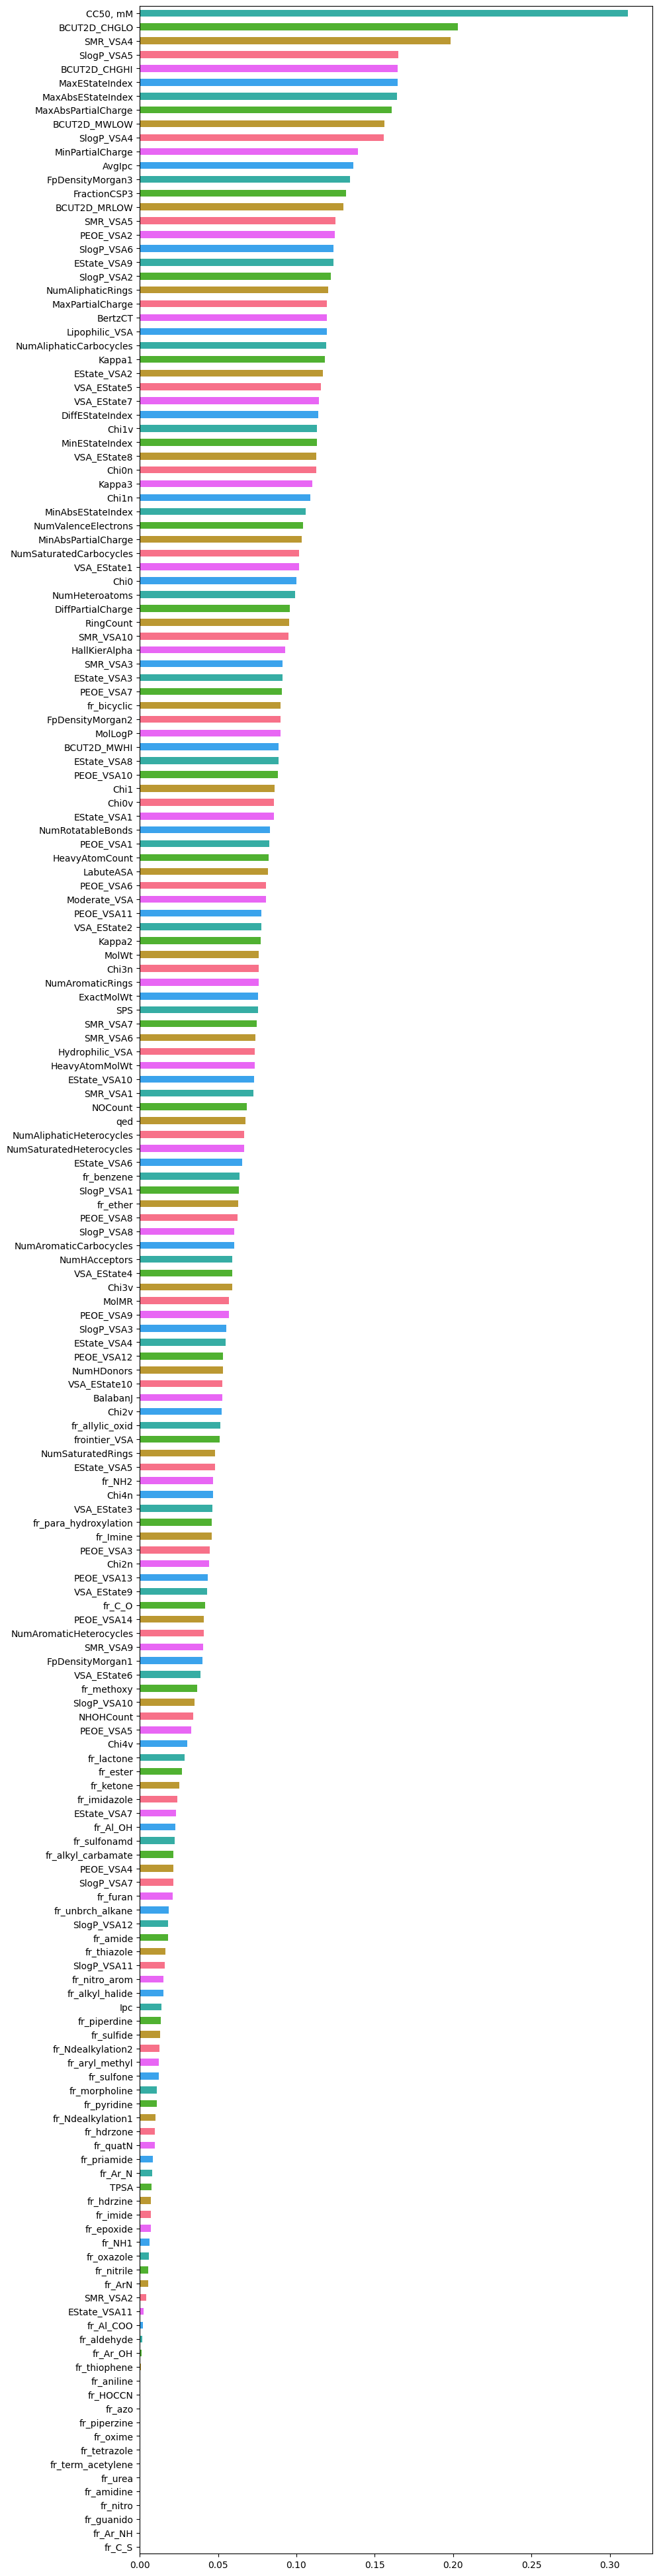

In [48]:
df_regr_SI = df.copy()
#Удалим другие сильнозависимые переменные
df_regr_SI.drop(columns=["IC50_class","CC50_class", "SI_class", "SI_8","IC50, mM"], inplace=True)

Y = df_regr_SI["SI"]
X = df_regr_SI.drop(columns="SI")

importances = mutual_info_regression(X, Y)

feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

colors = sns.color_palette("husl")
plt.figure(figsize=(10,50))
feature_importances.plot(kind='barh', color=colors)
plt.show()

**Удалим значения меньше 0.15**

In [49]:
del_list = feature_importances[feature_importances < 0.15].index.to_list()
df_regr_SI.drop(columns=del_list,inplace=True)

### **Классификация: превышает ли значение CC50 медианное значение выборки**


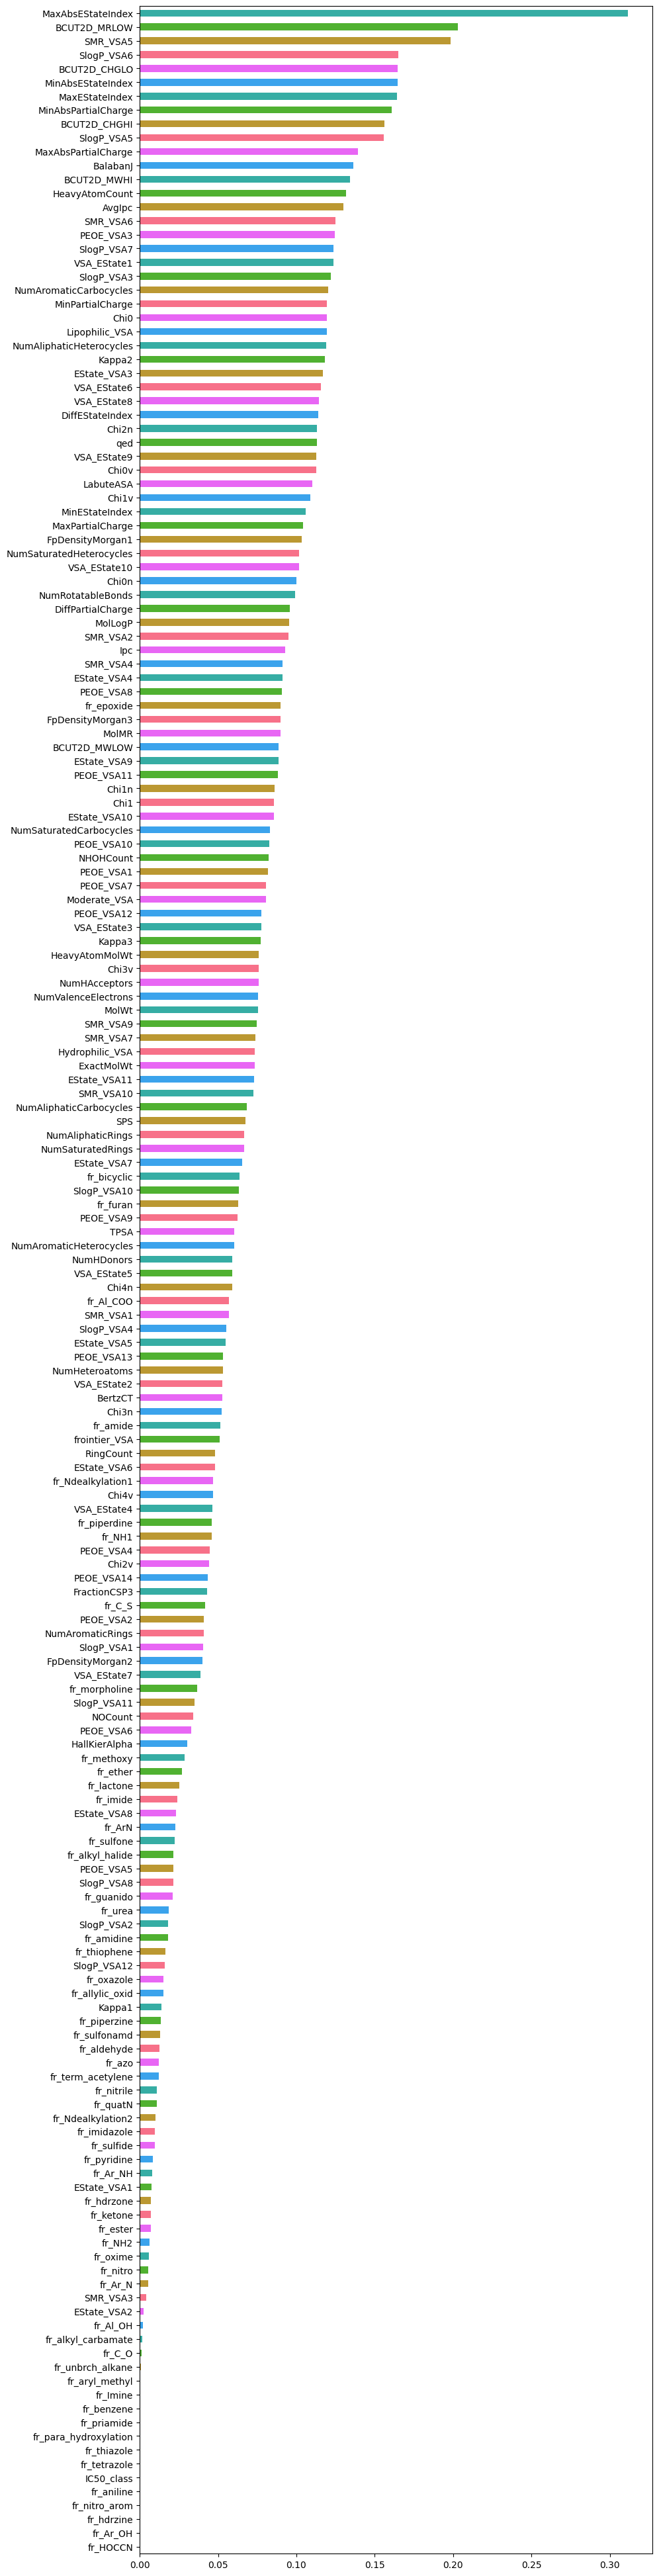

In [50]:
df_CC50_class = df.copy()
#Удалим другие сильнозависимые переменные
df_CC50_class.drop(columns=["CC50, mM", "SI_class", "SI_8","IC50, mM", "SI"], inplace=True)


Y = df_CC50_class["CC50_class"]
X = df_CC50_class.drop(columns="CC50_class")

mportances = mutual_info_regression(X, Y)

feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

colors = sns.color_palette("husl")
plt.figure(figsize=(10,50))
feature_importances.plot(kind='barh', color=colors)
plt.show()

In [51]:
del_list = feature_importances[feature_importances < 0.1].index.to_list()
df_CC50_class.drop(columns=del_list,inplace=True)

### **Классификация: превышает ли значение IC50 медианное значение выборки**
    

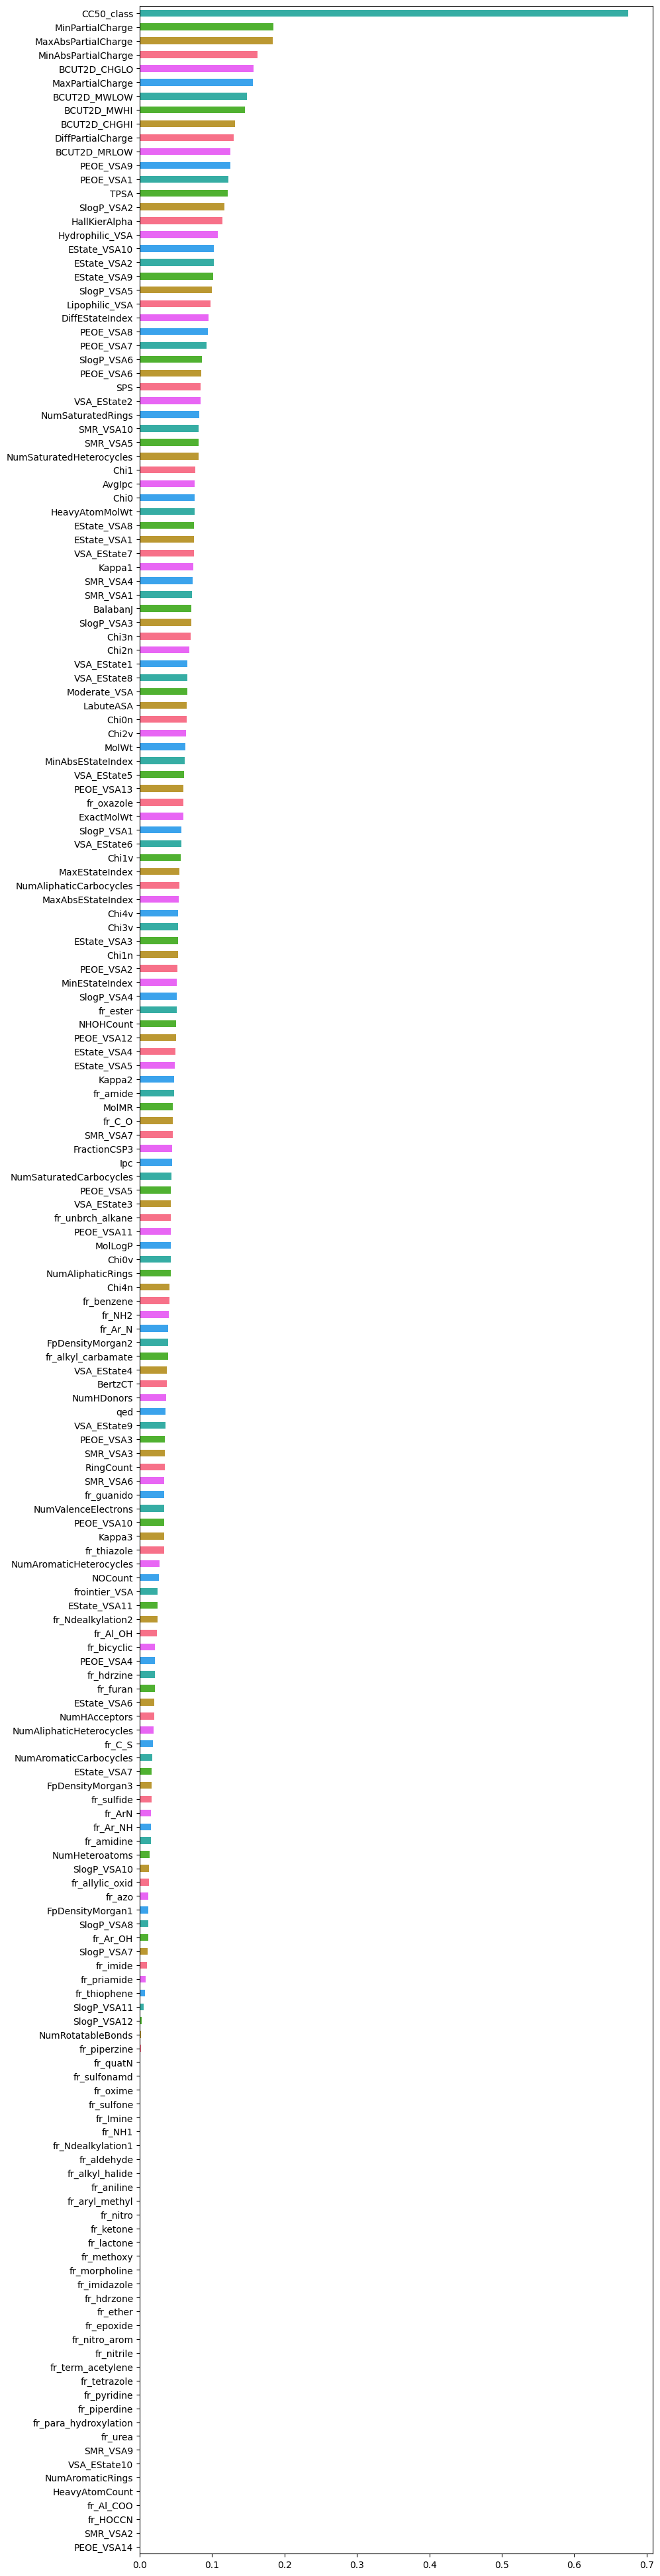

In [52]:
df_IC50_class = df.copy()
#Удалим другие сильнозависимые переменные
df_IC50_class.drop(columns=["CC50, mM", "SI_class", "SI_8","IC50, mM", "SI"], inplace=True)


y = df_IC50_class["IC50_class"]
X = df_IC50_class.drop(columns="IC50_class")

importances = mutual_info_regression(X, Y)

feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

colors = sns.color_palette("husl")
plt.figure(figsize=(10,50))
feature_importances.plot(kind='barh', color=colors)
plt.show()

In [53]:
del_list = feature_importances[feature_importances < 0.1].index.to_list()
df_IC50_class.drop(columns=del_list,inplace=True)

### **Классификация: превышает ли значение SI медианное значение выборки**
    
  
         

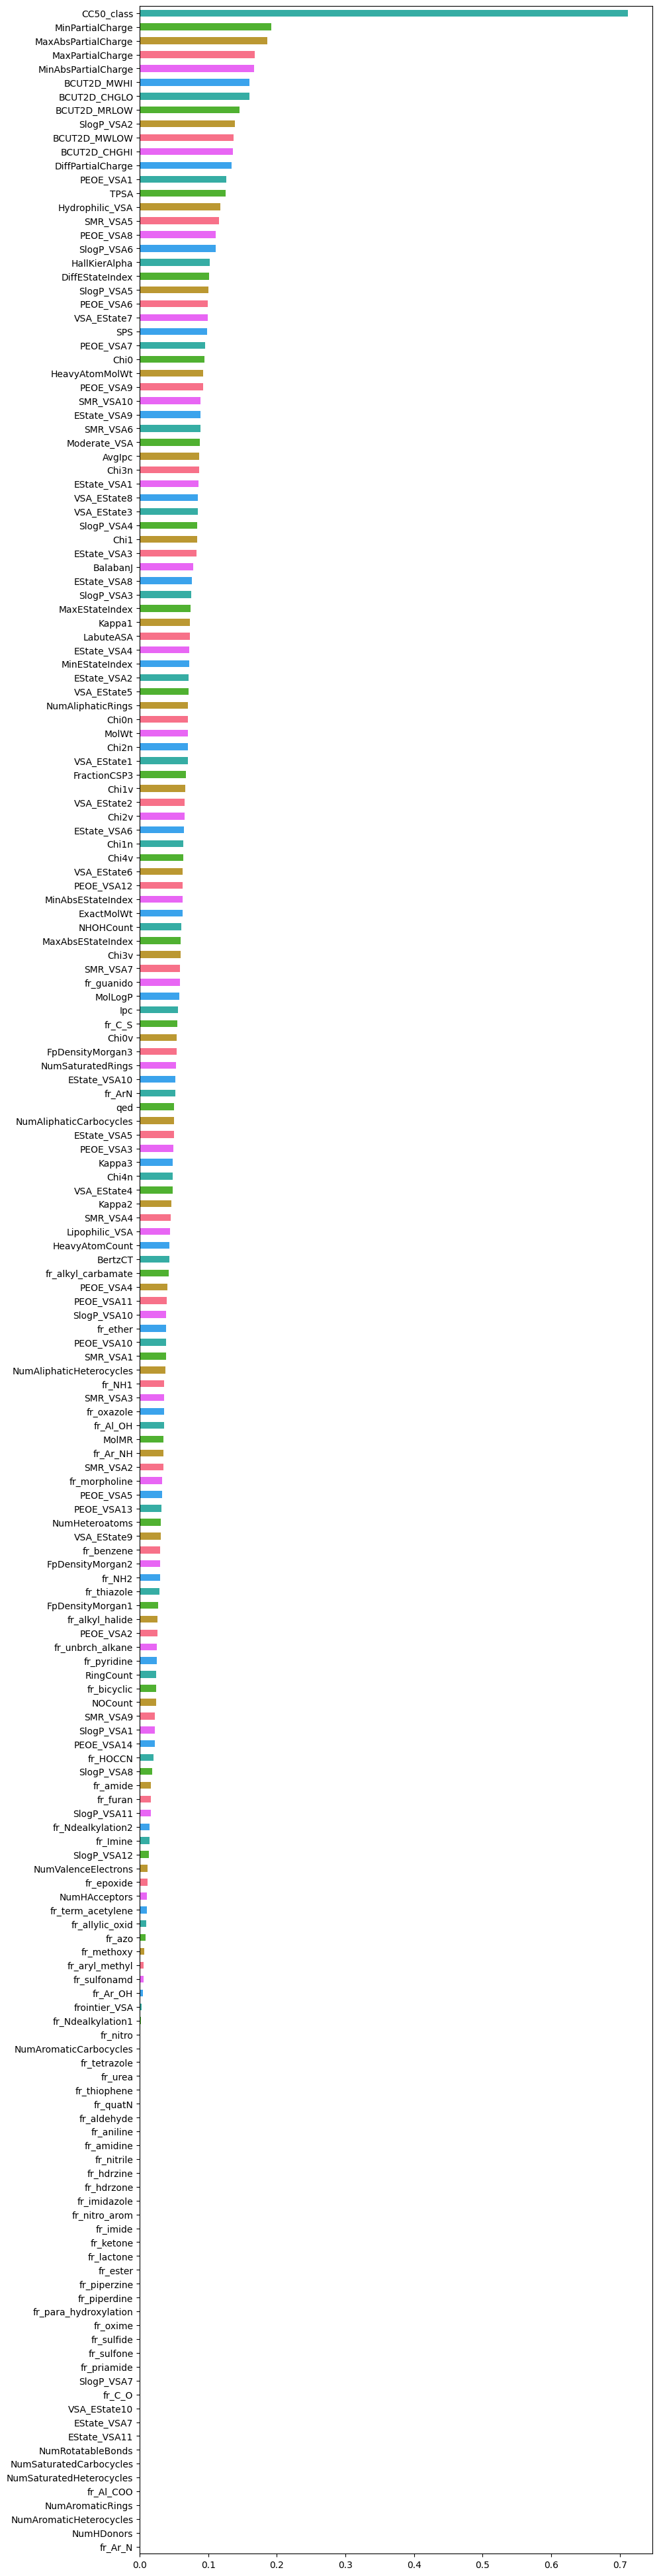

In [54]:
df_SI_class = df.copy()
#Удалим другие сильнозависимые переменные
df_SI_class.drop(columns=["CC50, mM", "IC50_class", "SI_8","IC50, mM", "SI"], inplace=True)


y = df_SI_class["SI_class"]
X = df_SI_class.drop(columns="SI_class")

importances = mutual_info_regression(X, Y)

feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

colors = sns.color_palette("husl")
plt.figure(figsize=(10,50))
feature_importances.plot(kind='barh', color=colors)
plt.show()

In [55]:
del_list = feature_importances[feature_importances < 0.05].index.to_list()
df_SI_class.drop(columns=del_list,inplace=True)

### **Классификация: превышает ли значение SI значение 8**

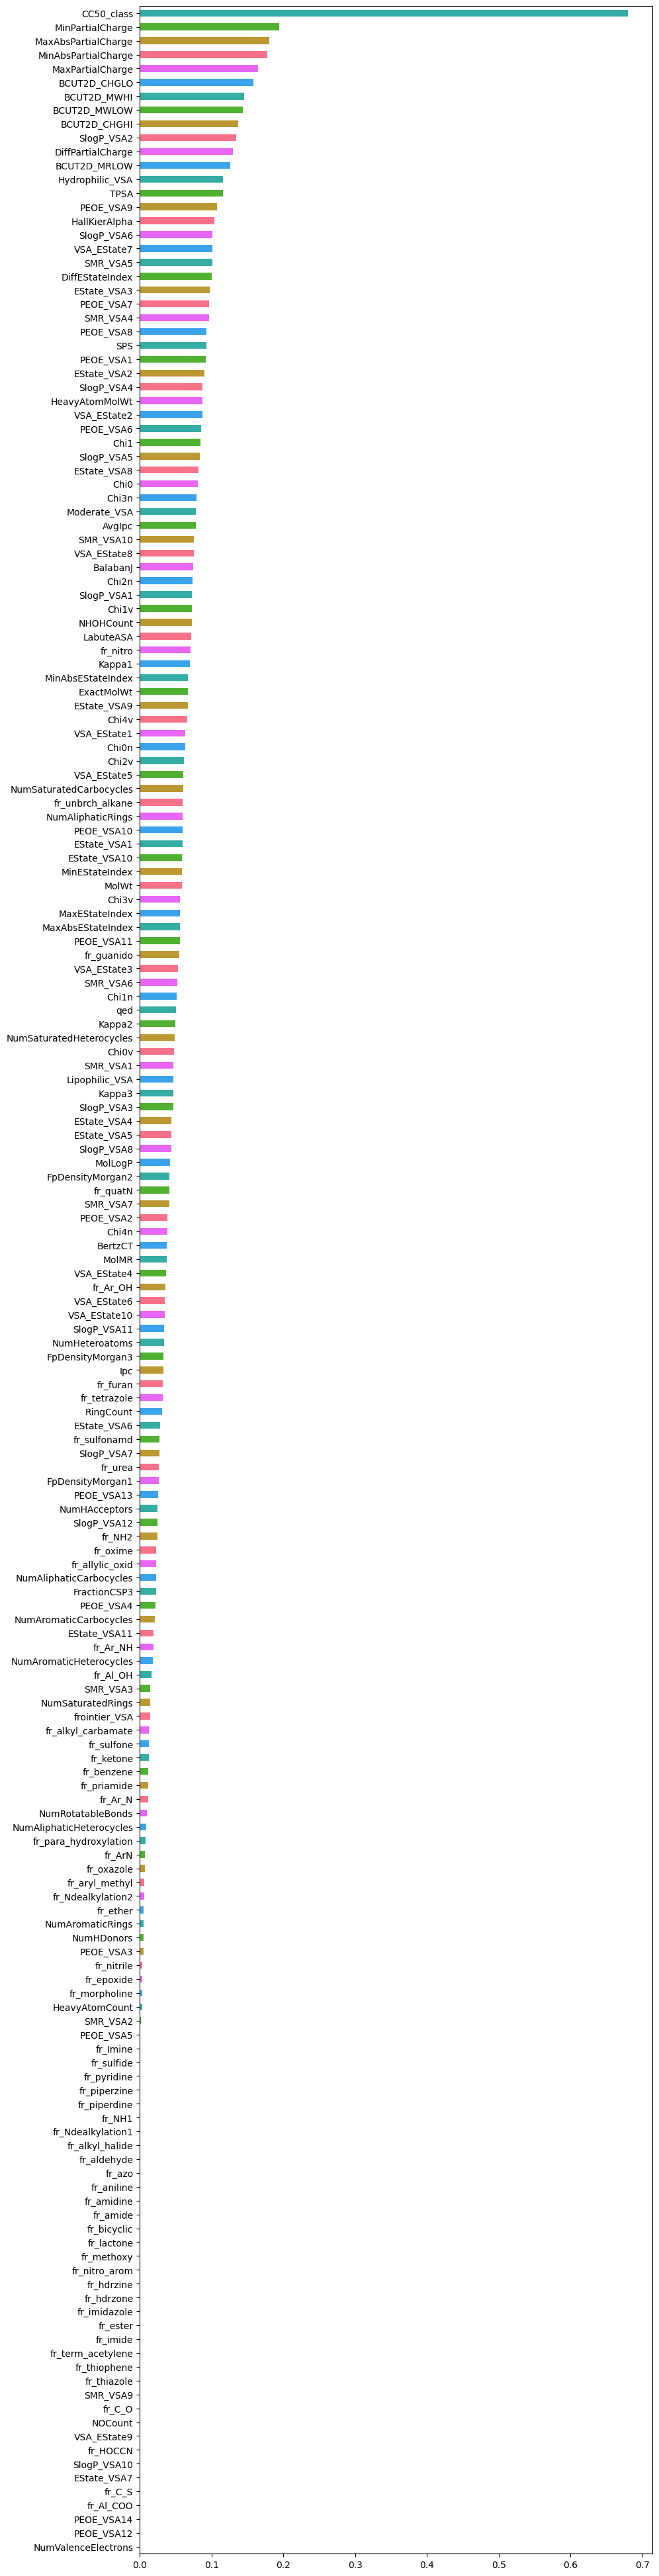

In [56]:
df_SI_8 = df.copy()
#Удалим другие сильнозависимые переменные
df_SI_8.drop(columns=["CC50, mM", "IC50_class", "SI_class","IC50, mM", "SI"], inplace=True)


y = df_SI_8["SI_8"]
X = df_SI_8.drop(columns="SI_8")

importances = mutual_info_regression(X, Y)

feature_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feature_importances = feature_importances.sort_values()

colors = sns.color_palette("husl")
plt.figure(figsize=(10,50))
feature_importances.plot(kind='barh', color=colors)
plt.show()

In [57]:
del_list = feature_importances[feature_importances < 0.05].index.to_list()
df_SI_8.drop(columns=del_list,inplace=True)